In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import quandl
import pandas as pd
import statsmodels
quandl.ApiConfig.api_key = 'u-ZEDNt17YSrdcfkeU9m'

# Retrieve TSLA data from Quandl
medtronics = quandl.get('WIKI/MDT')
medtronics = medtronics[-150:]



In [4]:
medtronics.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,79.90,80.770,79.760,80.04,4269204.0,0.0,1.0,79.90,80.770,79.760,80.04,4269204.0
2018-03-22,79.16,79.810,77.995,78.14,4437081.0,0.0,1.0,79.16,79.810,77.995,78.14,4437081.0
2018-03-23,78.21,78.600,76.410,76.55,5942063.0,0.0,1.0,78.21,78.600,76.410,76.55,5942063.0
2018-03-26,77.44,78.525,76.570,78.46,6116429.0,0.0,1.0,77.44,78.525,76.570,78.46,6116429.0
2018-03-27,78.74,79.500,77.645,78.16,5389116.0,0.0,1.0,78.74,79.500,77.645,78.16,5389116.0


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn') 


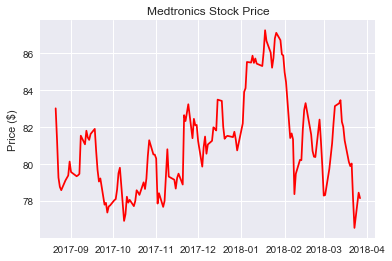

In [5]:
plt.plot(medtronics.index, medtronics['Adj. Close'], 'r')
plt.title('Medtronics Stock Price')
plt.ylabel('Price ($)');


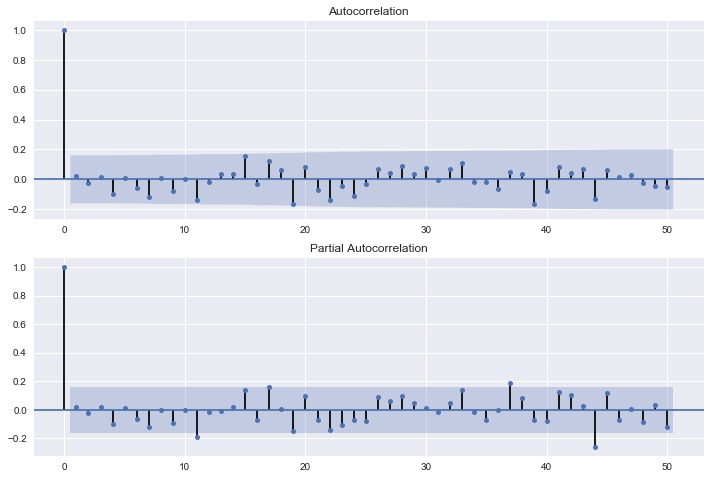

In [6]:
#plot the ACF and PACF plots

import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(medtronics['Adj. Close'].diff().dropna(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(medtronics['Adj. Close'].diff().dropna(), lags=50, ax=ax2)
plt.show()


In [12]:
stock_v = medtronics["Adj. Close"]

In [33]:
# there is only one significant value in autocorrelation
# there are only 4 significant values in partial autocorrelation
# order is 0
model = statsmodels.tsa.arima_model.ARIMA(stock_v, order=(1,0,4))
model_fit = model.fit()

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [34]:
# this model should result in lowest AIC
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Adj. Close   No. Observations:                  150
Model:                     ARMA(1, 4)   Log Likelihood                -212.141
Method:                       css-mle   S.D. of innovations              0.989
Date:                Sat, 04 Apr 2020   AIC                            438.282
Time:                        22:01:04   BIC                            459.356
Sample:                             0   HQIC                           446.843
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               81.0052      0.862     94.017      0.000      79.317      82.694
ar.L1.Adj. Close     0.9023      0.053     17.041      0.000       0.799       1.006
ma.L1.Adj. Close     0.0784      0.098      0.799      0.426      -0.114       0.271
ma.L2.Adj. Close     0.0241      0.097      0.247      0.805      -0.167       0.215
ma.L3.Adj. Close     0.0529      0.106      0.501      0.617      -0.154       0.260
ma.L4.Adj. Close    -0.0528      0.099     -0.536      0.593      -0.246       0.140
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1083           +0.0000j            1.1083            0.0000
MA.1           -1.8411           -0.0000j            1.8411           -0.5000
MA.2            0.1464           -2.0026j            2.0079           -0.2384
MA.3            0.1464           +2.0026j            2.0079            0.2384
MA.4            2.5502           -0.0000j            2.5502           -0.0000
-----------------------------------------------------------------------------
"""

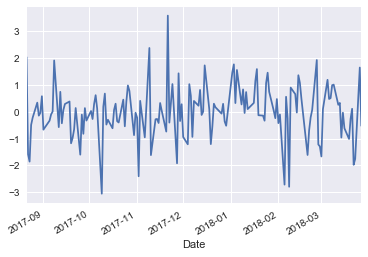

In [35]:
rid = model_fit.resid
rid.plot()

In [37]:
model_fit.fittedvalues

Date
2017-08-21    81.005221
2017-08-22    82.863441
2017-08-23    81.138108
2017-08-24    79.265728
2017-08-25    78.817224
                ...    
2018-03-21    79.931597
2018-03-22    80.115212
2018-03-23    78.306993
2018-03-26    76.819923
2018-03-27    78.684664
Length: 150, dtype: float64

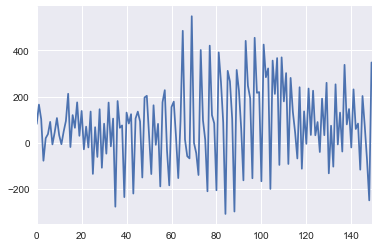

In [52]:
predicted = statsmodels.tsa.arima_model.ARMAResults(model, model_fit.fittedvalues)
predicted_v = predicted.predict()
pd.Series(predicted_v).plot()